In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
df = pd.read_csv("C:/Users/akanksha goel/OneDrive/Desktop/ml r/final practicals/LogisticData.csv",header = None)
df.columns = ["Marks_1","Marks_2","Status"]
df.head()

,Marks_1,Marks_2,Status
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
3,60.182599,86.308552,1
4,79.032736,75.344376,1


In [4]:
df.shape

(100, 3)

In [5]:
# # single variable
# df = df.loc[:, ['Marks_1', 'Status']]
# df.head()


In [6]:
X = df.iloc[:, :-1].values
Y = df.iloc[:, -1].values
Y

admitted = df.loc[Y == 1]
not_admitted = df.loc[Y == 0]


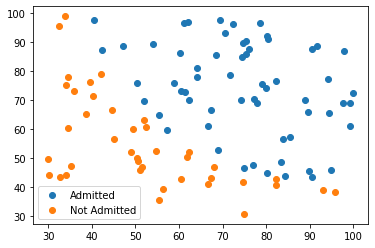

In [7]:
plt.scatter(admitted.iloc[:, 0], admitted.iloc[:, 1], label='Admitted')
plt.scatter(not_admitted.iloc[:, 0], not_admitted.iloc[:, 1], label='Not Admitted')
plt.legend()
plt.show()

In [8]:
# Y = pd.DataFrame(Y)
# Y.shape
# # X.shape

# Y.shape
m,n = X.shape




TRY 1

In [9]:
def sigmoid(z) :
    return 1/(1 + np.exp(-z))

In [10]:
def lr_hyp(x,theta) :
    return np.dot(x,theta)

In [11]:
z = np.ones(m)
z = z.reshape(m,1)
X = np.append(z,X,axis =1)
# X

In [12]:
m,n = X.shape
theta = np.zeros(n)
theta = theta.reshape(n,1)
Y = Y.reshape(-1,1)
def cal_cost(X,Y,theta) :
    t = -Y*(np.log(sigmoid(lr_hyp(X,theta)))) - (1-Y)*(np.log(1-sigmoid(lr_hyp(X,theta))))
    j = np.sum(t)/m
    return j
L = cal_cost(X,Y,theta)  
print(L)

0.6931471805599453


In [13]:
cost_list = list()
alphas = list()
iters = 1000

def gd(x,y, theta, alpha, iters):
    previous_cost = None
    for i in range(iters):
        val1=sigmoid(lr_hyp(x,theta))-y
        gradeint=np. dot (x.transpose(),val1)/m
        theta=theta-(alpha/m)*gradeint
        L=cal_cost(x,y,theta)
        if previous_cost and abs(previous_cost-L)<= 1e-6:
            print("iteration ",i)
            print("cost function value is ",L)
            cost_list .append(L)
            break
        previous_cost = L
    return theta
    

In [14]:
# alpha=float(input(" Enter the learning_rate: "))
alpha = 0.01
alphas. append(alpha)
theta = gd(X,Y, theta, alpha, iters)
print(" optimized parameters ", theta)

iteration  257
cost function value is  0.6297265843745893
 optimized parameters  [[-0.00172538]
 [ 0.00980537]
 [ 0.00108198]]


In [15]:
cost_list

[0.6297265843745893]

In [16]:
alphas

[0.01]

By sklearn

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 0 )
model1 = LogisticRegression()    
model1.fit( X_train, Y_train)
predictions = model1.predict( X_test )

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import classification_report

In [ ]:
# correctly_classified1 = 0
# count = 0    
# for count in range( np.size( Yp ) ) :            
#     if Y[count] == Yp[count] :            
#         correctly_classified1 = correctly_classified1 + 1              
#     count = count + 1

# print( "Accuracy on test set by sklearn model   :  ", (correctly_classified1 / count ) * 100 )

In [ ]:

print(confusion_matrix(Y_test,predictions))
print(classification_report(Y_test,predictions))
print("Accuracy : ",accuracy_score(Y_test,predictions)*100)